<a href="https://colab.research.google.com/github/Parabucolica/ProgramacaoEstatistica/blob/main/labs%5CProg_Estat_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Exercício 1: Bernoullis

## A - Gerador de Bernoulli

1. Implemente uma função que gere várias realizações de uma variável de Bernoulli com parâmetro $p$.  
2. Usando $p = 0.3$, compare o histograma das amostras obtidas com o gerador implementado com aquelas produzidas pela função `numpy.random.binomial`.



[Text(0.5, 1.0, 'Função do Numpy')]

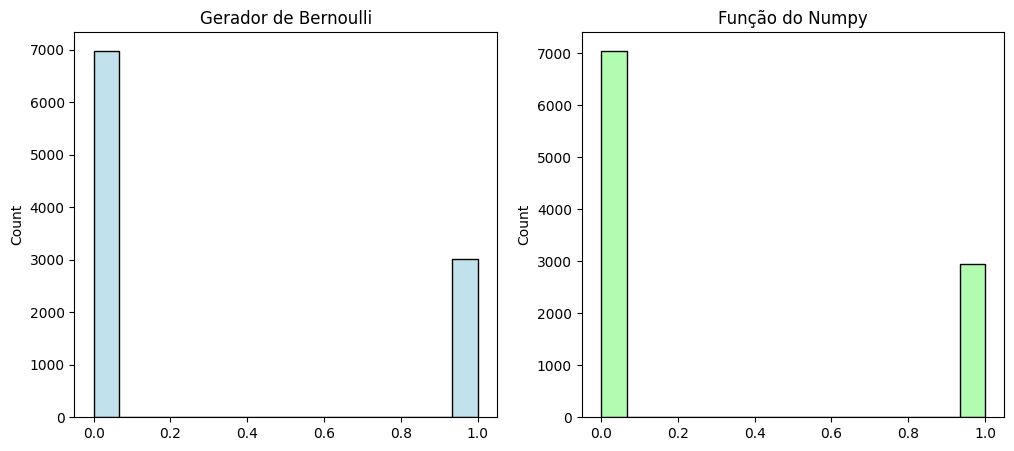

In [ ]:
def gerar_bernoulli(p):
  return 1 if np.random.uniform() <=p else 0

def amostra_bernoulli(p,size=10000):
  return [gerar_bernoulli(p) for _ in range(size)]

fig, axs = plt.subplots(ncols=2, figsize=(12,5))
sns.histplot(amostra_bernoulli(0.3), color='lightblue', ax=axs[0]).set(title='Gerador de Bernoulli')
sns.histplot(np.random.binomial(1,0.3,size=10000), color = 'palegreen', ax=axs[1]).set(title='Função do Numpy')


---

## B - Gerador de Uniforme via expansão binária

1. Usando o gerador de Bernoullis de parâmetro $0.5$, construa variáveis **Uniformes(0,1)** a partir da expansão binária:

   $$
   U = \sum_{k=1}^m \frac{B_k}{2^k}, \quad B_k \sim \text{Bernoulli}(0.5).
   $$

2. Gere uma amostra de tamanho $1000$ para $U$, utilizando $m$ bits de precisão (por exemplo, $m = 20$) e compare o histograma com a versão do numpy `numpy.random.uniform`.


[Text(0.5, 1.0, 'Via Numpy')]

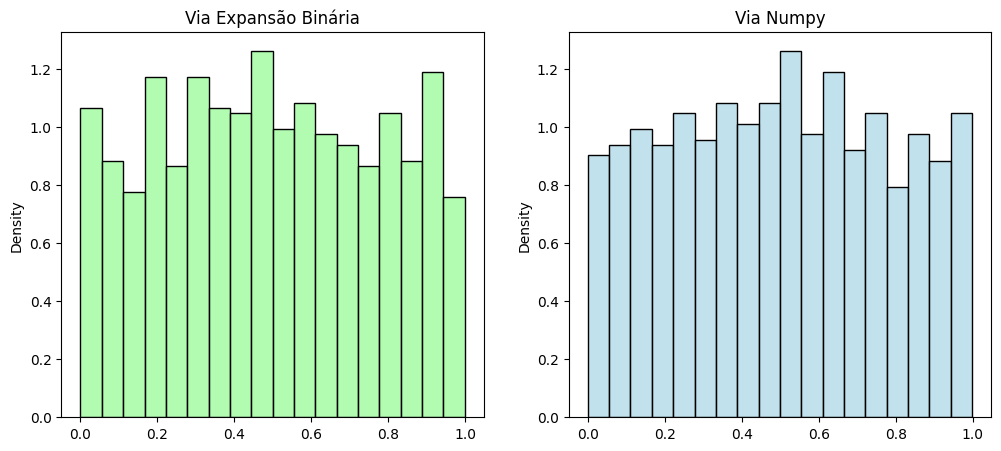

In [ ]:
def uniforme(m,size=1):
  amostras = []
  for _ in range(size):
    u = 0
    for i in range(1,m+1):
      u += gerar_bernoulli(0.5) / 2**i
    amostras.append(u)
  return amostras

a = uniforme(20,1000)

fig, axs = plt.subplots(ncols=2, figsize=(12,5))
sns.histplot(a, stat='density',ax=axs[0], color='palegreen',bins=18).set(title= 'Via Expansão Binária')
sns.histplot(np.random.uniform(size=1000),stat='density', color = 'lightblue', ax=axs[1],bins=18).set(title='Via Numpy')

# Exercício 2: Binomial

Implemente um gerador de variáveis aleatórias com distribuição Binomial($n,p$) utilizando **dois métodos diferentes**:

1. **Método via Bernoullis**: some $n$ variáveis independentes $B_i \sim \text{Bernoulli}(p)$.

2. **Método via inversão recursiva**: utilize a função de distribuição acumulada da Binomial e um gerador uniforme para determinar o valor da variável.

3. Compare o **tempo de execução** dos dois métodos ao gerar uma amostra de tamanho grande (por exemplo, $10^5$ observações).  
   - Fixe $n$ (por exemplo, $n=20$) e varie o valor de $p$ (por exemplo, $p=0.1, 0.3, 0.5, 0.7, 0.9$).  
   - Observe como o desempenho dos dois métodos se altera de acordo com $p$.  

   **Dica:** para medir o tempo, você pode usar:
   ```python
   import time
   start = time.time()
   # código a ser medido
   end = time.time()
   print("Tempo:", end - start)
   
   ```

4. Compare as **densidades empíricas** obtidas pelos dois métodos com a densidade de referência gerada pela função pronta `numpy.random.binomial`.  
   - Faça histogramas normalizados ou gráficos de barras lado a lado.  
   - Discuta se as distribuições coincidem e se há diferenças relevantes.

5. No caso do **método de inversão recursiva**, calcule o **número médio de passos** que o algoritmo dá até parar.  
   - Mostre empiricamente esse valor para diferentes $p$.  


Para p = 0.1, temos: 

Tempo via soma: 0.3975954055786133
Tempo via inversão: 0.02280735969543457
Tempo via Numpy: 0.00034737586975097656
 
número médio de passos da inversão:  3.0102
valor teorico: n*p + 1 = 3.0 

Para p = 0.3, temos: 

Tempo via soma: 0.3719305992126465
Tempo via inversão: 0.026928186416625977
Tempo via Numpy: 0.0005450248718261719
 
número médio de passos da inversão:  6.9971
valor teorico: n*p + 1 = 7.0 

Para p = 0.5, temos: 

Tempo via soma: 0.39316725730895996
Tempo via inversão: 0.0308837890625
Tempo via Numpy: 0.0007495880126953125
 
número médio de passos da inversão:  10.9745
valor teorico: n*p + 1 = 11.0 

Para p = 0.7, temos: 

Tempo via soma: 0.3754594326019287
Tempo via inversão: 0.03461194038391113
Tempo via Numpy: 0.0005478858947753906
 
número médio de passos da inversão:  14.951
valor teorico: n*p + 1 = 15.0 

Para p = 0.9, temos: 

Tempo via soma: 0.39270877838134766
Tempo via inversão: 0.03817486763000488
Tempo via Numpy: 0.00035643577575683594
 
n

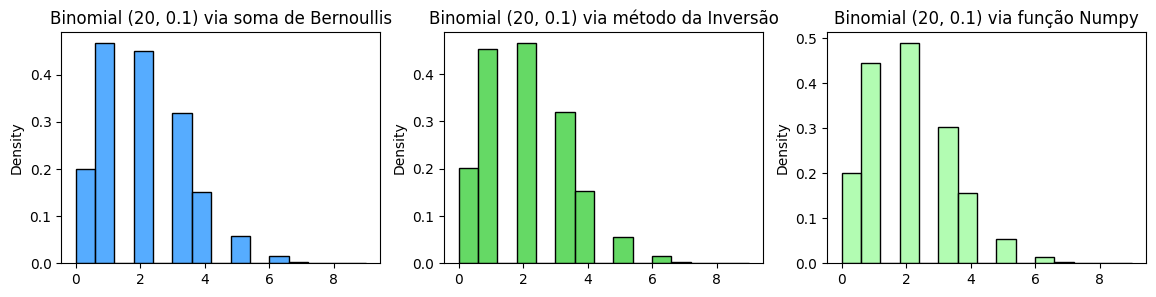

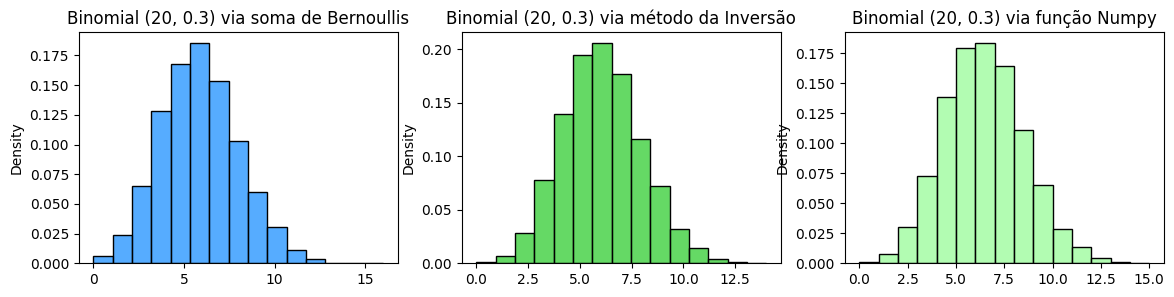

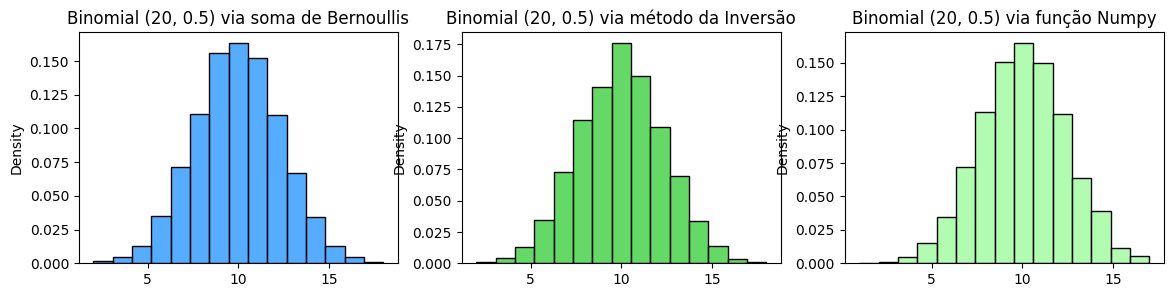

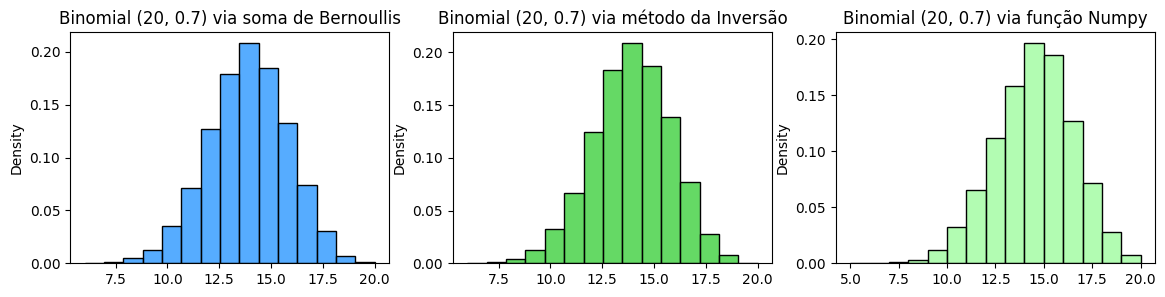

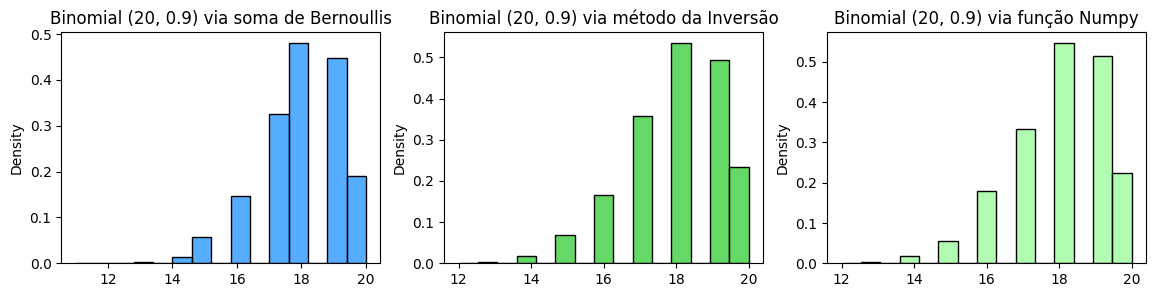

In [ ]:
def binomial_bernoullis(n,p):
  return sum(amostra_bernoulli(p,size=n))

def binomial_inversao(n,p_):
  u = np.random.uniform()
  p = (1-p_)**n
  F = p
  i = 0

  while u > F:
    p = (n-i)/(i+1) * p_/ (1-p_) * p
    F = F + p
    i += 1

  return i
# além do valor observado ser i, ao final da operação i+1 é o número de passos
# do algoritmo, de modo que a média de passos será a soma de todos os i+1,
# dividida pelo tamanho da amostra


# todos os itens do exercício estão condensados aqui
for prob in [0.1,0.3,0.5,0.7,0.9]:
  print(f'Para p = {prob}, temos: \n')

  start = time.time()
  a = [binomial_bernoullis(20,prob) for _ in range(10000)]
  end = time.time()

  print("Tempo via soma:", end - start)

  start = time.time()
  b = [binomial_inversao(20,prob) for _ in range (10000)]
  end = time.time()

  print("Tempo via inversão:", end - start)

  start = time.time()
  c = np.random.binomial(20,prob, size=10000)
  end = time.time()
  print("Tempo via Numpy:", end - start, end='\n \n')


  print("número médio de passos da inversão: ", sum([i+1 for i in a])/len(a))
  print(f"valor teorico: n*p + 1 = {20*prob + 1} \n")

  fig, axs = plt.subplots(ncols=3, figsize=(14,3))

  sns.histplot(a, stat='density', color='dodgerblue', bins=15,ax=axs[0]).set(title=f'Binomial (20, {prob}) via soma de Bernoullis')
  sns.histplot(b, stat='density', color= 'limegreen', bins=15,ax=axs[1]).set(title=f'Binomial (20, {prob}) via método da Inversão')
  sns.histplot(c, stat='density', color= 'palegreen', bins=15,ax=axs[2]).set(title=f'Binomial (20, {prob}) via função Numpy')

print('Num geral, as distribuições coincidem, exceto pela aleatoriedade, como esperávamos. \n \n')
